In [1]:
from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
!unrar x gdrive/MyDrive/NMDU/dataset.rar

Streaming output truncated to the last 5000 lines.
Extracting  dataset/labels/00000_Forest Fire (11).txt                     99%  OK 
Extracting  dataset/labels/00000_Forest Fire (111).txt                    99%  OK 
Extracting  dataset/labels/00000_Forest Fire (112).txt                    99%  OK 
Extracting  dataset/labels/00000_Forest Fire (113).txt                    99%  OK 
Extracting  dataset/labels/00000_Forest Fire (115).txt                    99%  OK 
Extracting  dataset/labels/00000_Forest Fire (116).txt                    99%  OK 
Extracting  dataset/labels/00000_Forest Fire (117).txt                    99%  OK 
Extracting  dataset/labels/00000_Forest Fire (118).txt                    99%  OK 
Extracting  dataset/labels/00000_Forest Fire (119).txt                    99%  OK 
Extracting  dataset/labels/00000_Forest Fire (12).txt                     99%  OK 
Extracting  dataset/labels/00

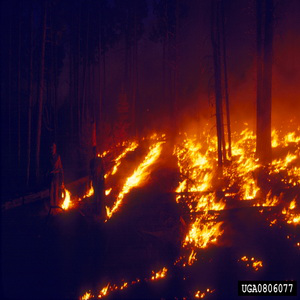

In [3]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('dataset/images/00000_0806077-LGPT.jpg')
img

In [4]:
!pwd

import os

dataTrainImagesPath = r'data/train/images'
if not os.path.exists(dataTrainImagesPath):
    os.makedirs(dataTrainImagesPath)

dataTrainLabelsPath = r'data/train/labels'
if not os.path.exists(dataTrainLabelsPath):
    os.makedirs(dataTrainLabelsPath)


dataValidImagesPath = r'data/valid/images'
if not os.path.exists(dataValidImagesPath):
    os.makedirs(dataValidImagesPath)

dataValidLabelsPath = r'data/valid/labels'
if not os.path.exists(dataValidLabelsPath):
    os.makedirs(dataValidLabelsPath)


dataTestImagesPath = r'data/test/images'
if not os.path.exists(dataTestImagesPath):
    os.makedirs(dataTestImagesPath)

dataTestLabelsPath = r'data/test/labels'
if not os.path.exists(dataTestLabelsPath):
    os.makedirs(dataTestLabelsPath)

!ls

/content
data  dataset  gdrive  sample_data


In [5]:
datasetDir = 'dataset'

datasetImagesDir = os.path.join(datasetDir, 'images')
print(datasetImagesDir)
datasetLabelsDir = os.path.join(datasetDir, 'labels')
print(datasetLabelsDir)

numberOfImages = len([name for name in os.listdir(datasetImagesDir) if os.path.isfile(os.path.join(datasetImagesDir, name))])
print(numberOfImages)
numberOfLabels = len([name for name in os.listdir(datasetLabelsDir) if os.path.isfile(os.path.join(datasetLabelsDir, name))])
print(numberOfLabels)

dataset/images
dataset/labels
6872
6872


In [6]:
datasetTrainStake = 0.60
datasetValidStake = 0.20
datasetTestStake = 0.20

numberOfTrainImages = round(numberOfImages * datasetTrainStake)
print(numberOfTrainImages)

numberOfValidImages = round(numberOfImages * datasetValidStake)
print(numberOfValidImages)

numberOfTestImages = numberOfImages - (numberOfTrainImages + numberOfValidImages)
print(numberOfTestImages)

print((numberOfTrainImages + numberOfValidImages + numberOfTestImages) == numberOfImages)

numberOfTestImages = 1374
print(numberOfTestImages)
numberOfValidImages = 1374
print(numberOfValidImages)
numberOfTrainImages = numberOfImages - (numberOfTestImages + numberOfValidImages)
print(numberOfTrainImages)

print((numberOfTrainImages + numberOfValidImages + numberOfTestImages) == numberOfImages)

4123
1374
1375
True
1374
1374
4124
True


In [7]:
# data augmentation


In [8]:
import numpy as np

namesOfImages = np.sort(np.asarray([f for f in os.listdir("dataset/images") if os.path.isfile(os.path.join("dataset/images", f))]))
print(namesOfImages)
print(namesOfImages.shape)

namesOfLabels = np.sort(np.asarray([f for f in os.listdir("dataset/labels") if os.path.isfile(os.path.join("dataset/labels", f))]))
print(namesOfLabels)
print(namesOfLabels.shape)

['00000_0806077-LGPT.jpg' '00000_0806078-LGPT.jpg'
 '00000_0976085-LGPT.jpg' ... 'NoFire (997).jpg' 'NoFire (998).jpg'
 'NoFire (999).jpg']
(6872,)
['00000_0806077-LGPT.txt' '00000_0806078-LGPT.txt'
 '00000_0976085-LGPT.txt' ... 'NoFire (997).txt' 'NoFire (998).txt'
 'NoFire (999).txt']
(6872,)


In [9]:
np.random.seed(1)
indices = np.asarray([i for i in range(numberOfImages)])
# np.random.choice(range(numberOfImages), size=(numberOfImages, ), replace = False)
print(indices)
print(indices.shape)

indices = np.random.permutation(numberOfImages)
# indicesTrain, indicesValid, indicesTest = indices[:numberOfTrainImages], indices[numberOfTestImages + 1: numberOfTestImages + numberOfValidImages + 1], indices[numberOfTestImages + numberOfValidImages + 1:]

indicesTrain = indices[:numberOfTrainImages]
indicesValid = indices[numberOfTrainImages: numberOfTrainImages + numberOfValidImages]
indicesTest = indices[numberOfTrainImages + numberOfValidImages:]

print(indicesTrain)
print(indicesTrain.shape)
print(indicesValid)
print(indicesValid.shape)
print(indicesTest)
print(indicesTest.shape)

[   0    1    2 ... 6869 6870 6871]
(6872,)
[5169 2934 5933 ... 4600 5719  765]
(4124,)
[1270 6488 3699 ... 4255 1982 5871]
(1374,)
[4020  371 3482 ... 3980  235 5157]
(1374,)


In [10]:
namesOfImagesTrain = namesOfImages[indicesTrain]
namesOfImagesValid = namesOfImages[indicesValid]
namesOfImagesTest = namesOfImages[indicesTest]

print(namesOfImagesTrain)
print(namesOfImagesTrain.shape)
print(namesOfImagesValid)
print(namesOfImagesValid.shape)
print(namesOfImagesTest)
print(namesOfImagesTest.shape)

namesOfLabelsTrain = namesOfLabels[indicesTrain]
namesOfLabelsValid = namesOfLabels[indicesValid]
namesOfLabelsTest = namesOfLabels[indicesTest]

print(namesOfLabelsTrain)
print(namesOfLabelsTrain.shape)
print(namesOfLabelsValid)
print(namesOfLabelsValid.shape)
print(namesOfLabelsTest)
print(namesOfLabelsTest.shape)

['NoFire (2559).jpg' '00000_NewFire (3950).jpg' 'NoFire (3246).jpg' ...
 'NoFire (2046).jpg' 'NoFire (3053).jpg' '00000_Fire 1616.jpg']
(4124,)
['00000_Fire 295.jpg' 'NoFire (653).jpg' 'NoFire (1235).jpg' ...
 'NoFire (1736).jpg' '00000_Forest Fire (269).jpg' 'NoFire (3190).jpg']
(1374,)
['NoFire (1524).jpg' '00000_Fire 1236.jpg' 'NoFire (104).jpg' ...
 'NoFire (1489).jpg' '00000_Fire 1110.jpg' 'NoFire (2548).jpg']
(1374,)
['NoFire (2559).txt' '00000_NewFire (3950).txt' 'NoFire (3246).txt' ...
 'NoFire (2046).txt' 'NoFire (3053).txt' '00000_Fire 1616.txt']
(4124,)
['00000_Fire 295.txt' 'NoFire (653).txt' 'NoFire (1235).txt' ...
 'NoFire (1736).txt' '00000_Forest Fire (269).txt' 'NoFire (3190).txt']
(1374,)
['NoFire (1524).txt' '00000_Fire 1236.txt' 'NoFire (104).txt' ...
 'NoFire (1489).txt' '00000_Fire 1110.txt' 'NoFire (2548).txt']
(1374,)


In [11]:
import shutil

for imageName in namesOfImagesTrain:
  shutil.copyfile("dataset/images/" + imageName, "data/train/images/" + imageName)
for labelName in namesOfLabelsTrain:
  shutil.copyfile("dataset/labels/" + labelName, "data/train/labels/" + labelName)

for imageName in namesOfImagesValid:
  shutil.copyfile("dataset/images/" + imageName, "data/valid/images/" + imageName)
for labelName in namesOfLabelsValid:
  shutil.copyfile("dataset/labels/" + labelName, "data/valid/labels/" + labelName)

for imageName in namesOfImagesTest:
  shutil.copyfile("dataset/images/" + imageName, "data/test/images/" + imageName)
for labelName in namesOfLabelsTest:
  shutil.copyfile("dataset/labels/" + labelName, "data/test/labels/" + labelName)

In [12]:
# import shutil
# shutil.rmtree("data/")
# shutil.rmtree("dataset/")

In [13]:
print(len([name for name in os.listdir("data/train/images/") if os.path.isfile(os.path.join("data/train/images/", name))]))
print(len([name for name in os.listdir("data/train/labels/") if os.path.isfile(os.path.join("data/train/labels/", name))]))

print(len([name for name in os.listdir("data/valid/images/") if os.path.isfile(os.path.join("data/valid/images/", name))]))
print(len([name for name in os.listdir("data/valid/labels/") if os.path.isfile(os.path.join("data/valid/labels/", name))]))

print(len([name for name in os.listdir("data/test/images/") if os.path.isfile(os.path.join("data/test/images/", name))]))
print(len([name for name in os.listdir("data/test/labels/") if os.path.isfile(os.path.join("data/test/labels/", name))]))

4124
4124
1374
1374
1374
1374


In [14]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
rar is already the newest version (2:5.5.0-1build1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [15]:
!rar a "gdrive/MyDrive/NMDU/data.rar" "data"

Streaming output truncated to the last 5000 lines.
Updating  data/train/images/00000_NewFire (4009).jpg                      47%  OK 
Updating  data/train/images/NoFire (3354).jpg                             47%  OK 
Updating  data/train/images/NoFire (3107).jpg                             47%  OK 
Updating  data/train/images/NoFire (1882).jpg                             47%  OK 
Updating  data/train/images/NoFire (600).jpg                              47%  OK 
Updating  data/train/images/00000_Fire 1778.jpg                           47%  OK 
Updating  data/train/images/00000_Fire 1377.jpg                           47%  OK 
Updating  data/train/images/NoFire (307).jpg                              47%  OK 
Updating  data/train/images/NoFire (2354).jpg                             47%  OK 
Updating  data/train/images/00000_NewFire (3302).jpg                      47%  OK 
Updating  data/train/images/0